#### mục tiêu: luyện tập mã hóa và rời rạc hóa dữ liệu

#### Khai báo thư viện cần dùng

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [4]:
# đọc dữ liệu
df = pd.read_csv("Credit_Scoring.csv", header=0, encoding = "ISO-8859-1")
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
# in ra kich thuoc du lieu
df.shape

(149992, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [7]:
# mô tả dữ liệu
df['MonthlyIncome'].describe()

count    1.202620e+05
mean     6.669872e+03
std      1.438414e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [8]:
df['age'].describe()

count    149992.000000
mean         52.295516
std          14.771902
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [9]:
# kiểm tra dữ liệu bị khuyết
df.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,True,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


#### Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột

In [10]:
# thay thế dữ liệu khuyết thiếu bởi giá trị nội suy theo cột
df2 = df.interpolate(axis=1)
df2

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9.0,0.0,0.116951,27.0,0.0,46.000000,24.0,2.0,0.0,0.0,0.0,0.0
1,10.0,0.0,0.189169,57.0,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0
2,11.0,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,12.0,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,13.0,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996.0,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149988,149997.0,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149989,149998.0,0.0,0.246044,58.0,0.0,3870.000000,1944.0,18.0,0.0,1.0,0.0,0.0
149990,149999.0,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  float64
 1   SeriousDlqin2yrs                      149992 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  float64
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  float64
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         149992 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  float64
 8   NumberOfTimes90DaysLate               149992 non-null  float64
 9   NumberRealEstateLoansOrLines          149992 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  float64
 11  

In [11]:
df2.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,False,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


#### Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị 0

In [15]:
df3=df
df3['MonthlyIncome'] = df['MonthlyIncome'].fillna(0)
df3

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,0.0,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [16]:
# hiển thị những dòng có MonthlyIncome vừa được thay thế
df3[df3['MonthlyIncome'] == 0]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.0,0.0,2,0,0,0,NaN
6,15,0,0.019657,76,0,477.0,0.0,6,0,1,0,0.0
8,17,0,0.061086,78,0,2058.0,0.0,10,0,2,0,0.0
24,33,0,0.083418,62,0,977.0,0.0,6,0,1,0,0.0
33,42,0,0.072898,81,0,75.0,0.0,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149968,149977,0,0.000627,76,0,60.0,0.0,5,0,0,0,0.0
149969,149978,0,0.236450,29,0,349.0,0.0,3,0,0,0,0.0
149976,149985,0,0.037548,84,0,25.0,0.0,5,0,0,0,0.0
149984,149993,0,0.871976,50,0,4132.0,0.0,11,0,1,0,3.0


In [17]:
#Xóa bỏ dòng ngoại lai <0 của MonthlyIncome
df3 = df3[df3['MonthlyIncome'] >= 0]
df3

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,0.0,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


#### Vẽ biểu đồ boxplot, biểu đồ phân bố dữ liệu cho các cột

<AxesSubplot:xlabel='MonthlyIncome'>

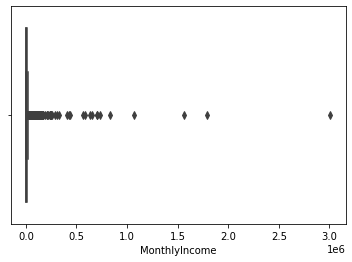

In [16]:
sns.boxplot(x=df3['MonthlyIncome']) 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

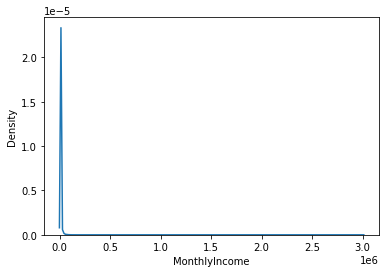

In [17]:
sns.kdeplot(data=df3['MonthlyIncome']) 

#### Loại bỏ giá trị ngoại lai

In [20]:
Q1 = df3['MonthlyIncome'].quantile(0.25)
Q3 = df3['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
df4 = df3.loc[:,:][(df3['MonthlyIncome']>Q1-1.5*IQR)&(df3['MonthlyIncome']<Q3+1.5*IQR)]
display(df4)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,0.0,2,0,0,0,NaN
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
5,14,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [22]:
# số bản ghi còn lại
100*df4.shape[0]/df3.shape[0]

97.15784841858232

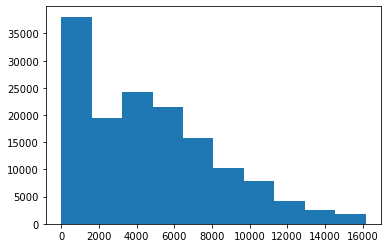

In [33]:
plt.hist(df4['MonthlyIncome'], bins=10)
plt.show()

<AxesSubplot:xlabel='MonthlyIncome'>

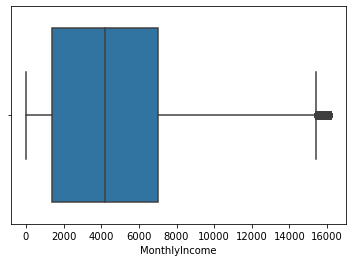

In [34]:
sns.boxplot(x=df4['MonthlyIncome'])

#### Chia dữ liệu ở các cột thành 4,5,6 nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng giữ liệu của mỗi nhóm.

In [ ]:
# Rời rạc hóa dữ liệu ở cột MonthlyIncome
# chia thành 4 khoảng giá trị có độ dài bằng nhau

In [48]:
cats = pd.qcut(df4['MonthlyIncome'], q=4)
cats

0          (-0.001, 1400.0]
2          (1400.0, 4200.0]
3          (4200.0, 7000.0]
4         (7000.0, 16167.0]
5         (7000.0, 16167.0]
                ...        
149987     (1400.0, 4200.0]
149988     (4200.0, 7000.0]
149989     (-0.001, 1400.0]
149990     (4200.0, 7000.0]
149991    (7000.0, 16167.0]
Name: MonthlyIncome, Length: 145729, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 1400.0] < (1400.0, 4200.0] < (4200.0, 7000.0] < (7000.0, 16167.0]]

In [49]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(1400.0, 4200.0]     36718
(-0.001, 1400.0]     36462
(4200.0, 7000.0]     36339
(7000.0, 16167.0]    36210
Name: MonthlyIncome, dtype: int64

In [34]:
# Rời rạc hóa dữ liệu ở cột MonthlyIncome
# chia thành 5 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df4['MonthlyIncome'], bins=5)
cats

0          (-16.167, 3233.4]
2          (-16.167, 3233.4]
3           (6466.8, 9700.2]
4          (9700.2, 12933.6]
5         (12933.6, 16167.0]
                 ...        
149987     (-16.167, 3233.4]
149988      (3233.4, 6466.8]
149989     (-16.167, 3233.4]
149990      (3233.4, 6466.8]
149991      (6466.8, 9700.2]
Name: MonthlyIncome, Length: 145729, dtype: category
Categories (5, interval[float64, right]): [(-16.167, 3233.4] < (3233.4, 6466.8] < (6466.8, 9700.2] < (9700.2, 12933.6] < (12933.6, 16167.0]]

In [35]:
pd.value_counts(cats)

(-16.167, 3233.4]     57484
(3233.4, 6466.8]      45642
(6466.8, 9700.2]      26033
(9700.2, 12933.6]     12199
(12933.6, 16167.0]     4371
Name: MonthlyIncome, dtype: int64

In [59]:
cats = pd.qcut(df4['MonthlyIncome'], q=[0, .2, .4, .6, .8, 1], duplicates='drop')
cats

0          (-0.001, 3300.0]
2          (-0.001, 3300.0]
3          (5200.0, 7859.4]
4         (7859.4, 16167.0]
5         (7859.4, 16167.0]
                ...        
149987     (-0.001, 3300.0]
149988     (5200.0, 7859.4]
149989     (-0.001, 3300.0]
149990     (5200.0, 7859.4]
149991    (7859.4, 16167.0]
Name: MonthlyIncome, Length: 145729, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 3300.0] < (3300.0, 5200.0] < (5200.0, 7859.4] < (7859.4, 16167.0]]

In [60]:
pd.value_counts(cats)

(-0.001, 3300.0]     58401
(3300.0, 5200.0]     29436
(7859.4, 16167.0]    29146
(5200.0, 7859.4]     28746
Name: MonthlyIncome, dtype: int64

In [56]:
cats=pd.qcut(df4.loc[:, 'age'], 5 )
cats

0         (-0.001, 39.0]
2         (-0.001, 39.0]
3           (48.0, 56.0]
4           (39.0, 48.0]
5           (39.0, 48.0]
               ...      
149987     (65.0, 109.0]
149988      (39.0, 48.0]
149989      (56.0, 65.0]
149990    (-0.001, 39.0]
149991      (56.0, 65.0]
Name: age, Length: 145729, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 39.0] < (39.0, 48.0] < (48.0, 56.0] < (56.0, 65.0] < (65.0, 109.0]]

In [57]:
pd.value_counts(cats)

(-0.001, 39.0]    31628
(39.0, 48.0]      29581
(56.0, 65.0]      28581
(65.0, 109.0]     27997
(48.0, 56.0]      27942
Name: age, dtype: int64

In [61]:
cats=pd.qcut(df4.loc[:, 'age'], 6 )
cats

0         (-0.001, 37.0]
2         (-0.001, 37.0]
3           (45.0, 52.0]
4           (45.0, 52.0]
5           (37.0, 45.0]
               ...      
149987     (67.0, 109.0]
149988      (37.0, 45.0]
149989      (52.0, 59.0]
149990    (-0.001, 37.0]
149991      (59.0, 67.0]
Name: age, Length: 145729, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 37.0] < (37.0, 45.0] < (45.0, 52.0] < (52.0, 59.0] < (59.0, 67.0] < (67.0, 109.0]]

In [63]:
pd.value_counts(cats)

(-0.001, 37.0]    26134
(45.0, 52.0]      25141
(37.0, 45.0]      24210
(59.0, 67.0]      23729
(52.0, 59.0]      23327
(67.0, 109.0]     23188
Name: age, dtype: int64

#### Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.

In [38]:
# định nghĩa khoảng giá trị các nhóm
bins = [0, 30, 40, 50, 80, 150]

In [41]:
# thực hiện rời rạc hóa
cats = pd.cut(df4['age'], bins)
cats

0          (0, 30]
2          (0, 30]
3         (50, 80]
4         (40, 50]
5         (30, 40]
            ...   
149987    (50, 80]
149988    (40, 50]
149989    (50, 80]
149990     (0, 30]
149991    (50, 80]
Name: age, Length: 145729, dtype: category
Categories (5, interval[int64, right]): [(0, 30] < (30, 40] < (40, 50] < (50, 80] < (80, 150]]

In [42]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(50, 80]     72304
(40, 50]     33902
(30, 40]     23910
(0, 30]      10723
(80, 150]     4889
Name: age, dtype: int64

In [44]:
# danh sách nhãn
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior', 'Old']
pd.cut(df4['age'], bins, labels=group_names)

0              Youth
2              Youth
3             Senior
4         MiddleAged
5         YoungAdult
             ...    
149987        Senior
149988    MiddleAged
149989        Senior
149990         Youth
149991        Senior
Name: age, Length: 145729, dtype: category
Categories (5, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior' < 'Old']